In [15]:
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import LargeMultinomialLogitStep
import orca
# import os; os.chdir('../')
import warnings; warnings.simplefilter('ignore')
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from scripts import datasources, models, variables, utils

Registering model step 'auto_ownership'
Registering model step 'TOD_choice'
Registering model step 'primary_mode_choice'
Registering model step 'WLCM'


In [3]:
orca.run(['initialize_network_walk','initialize_network_walk'])

Running step 'initialize_network_walk'
Time to execute step 'initialize_network_walk': 0.00 s
Running step 'initialize_network_walk'
Time to execute step 'initialize_network_walk': 0.00 s
Total time to execute iteration 1 with iteration value None: 0.00 s


If accessibilities already exist:

In [ ]:
walk_net_vars = pd.read_csv('./data/walk_net_vars.csv', index_col='osmid')
drive_net_vars = pd.read_csv('./data/drive_net_vars.csv', index_col='osmid')
zones = pd.read_csv('./data/zones_w_access_vars.csv', index_col='zone_id', dtype={'zone_id': int})
orca.add_table('nodeswalk', walk_net_vars)
orca.add_table('nodessmall', drive_net_vars)
orca.add_table('zones', zones)

If generating on the fly:

In [19]:
# orca.run([
#     'network_aggregations_small', 'network_aggregations_walk', 'impute_missing_skims',
#     'skims_aggregations_drive', 'skims_aggregations_other'])

# orca.get_table('nodeswalk').to_frame().to_csv('./data/walk_net_vars.csv')
# orca.get_table('nodessmall').to_frame().to_csv('./data/drive_net_vars.csv')
# orca.get_table('zones').to_frame().to_csv('./data/zones_w_access_vars.csv')

Visualize skim-based accesibilities;

In [6]:
zones = orca.get_table('zones').to_frame()

In [9]:
gdf = gpd.read_file('/home/data/spring_2019/base/Transportation_Analysis_Zones.shp')

In [12]:
gdf = gdf.merge(
    zones[['total_jobs_gen_tt_CAR_15', 'total_jobs_gen_tt_CAR_45']],
    left_on='taz1454', right_index=True)

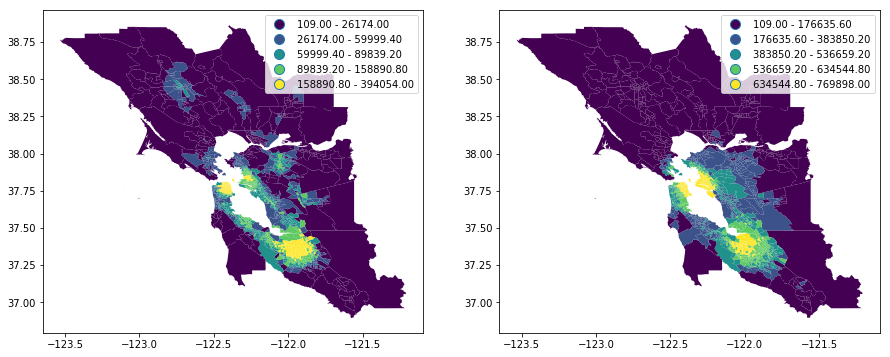

In [18]:
fig, axarr = plt.subplots(1, 2, figsize=(15,8))
gdf.plot(column='total_jobs_gen_tt_CAR_15', scheme='quantiles', ax=axarr[0], legend=True)
gdf.plot(column='total_jobs_gen_tt_CAR_45', scheme='quantiles', ax=axarr[1], legend=True)